In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import torch
import transformers

pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 100

In [2]:
jobs = pd.read_csv('./data/jobs_clean.csv')
print('Jobs shape:', jobs.shape)
jobs.info()
jobs.head()

Jobs shape: (233, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_position      233 non-null    object
 1   company_name      233 non-null    object
 2   job_country       233 non-null    object
 3   job_posting_date  233 non-null    object
 4   Employment_type   233 non-null    object
 5   Seniority_level   231 non-null    object
 6   job_description   233 non-null    object
dtypes: object(7)
memory usage: 12.9+ KB


,job_position,company_name,job_country,job_posting_date,Employment_type,Seniority_level,job_description
0,Data Scientist,MatchaTalent,Saudi Arabia,2023-06-18,Full-time,Entry level,"This role required candidate to permanently relocate at Dhahran, Saudi Arabia. About the CompanyThis company engages in the exploration, production, transportation, and sale of crude oil and natur..."
1,Data Science Specialist,Halian,Saudi Arabia,2023-05-16,Full-time,Entry level,Our ClientWe are partnered with one of the biggest players in the Financial Services sector in Saudi Arabia.On their behalf we are looking to hire a Data Scientist Specialist.Your Responsibilities...
2,Data Scientist,Garima Interprises,Saudi Arabia,2023-06-02,Full-time,Entry level,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c..."
3,Data Scientist,Garima Interprises,Saudi Arabia,2023-05-11,Full-time,Entry level,"We are looking to hire a highly creative data scientist to address data analytics challenges in our organization, to collect large volumes of data from varying sources, clean and interpret data, c..."
4,Data Scientist Engineer,Energy Jobline,Saudi Arabia,2023-06-07,Full-time,Entry level,"Aramco energizes the world economy. Aramco occupies a unique position in the global energy industry. We are the world's largest producer of hydrocarbons (oil and gas), with the lowest upstream car..."


In [3]:
tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
freq_mat = tfidf.fit_transform(jobs['job_description'])
print('Vectorized matrix shape:', freq_mat.shape)

Vectorized matrix shape: (233, 9332)


In [4]:
# print(dir(tfidf))
len(tfidf.get_feature_names())

9332

In [5]:
freq_mat.sum(axis=0).tolist()[0]

[0.21676207876931053,
 2.323799929957774,
 0.0892822096681136,
 0.1586755278693901,
 0.06459126045700508,
 0.04163509742518486,
 0.13069466149007455,
 0.160646192256086,
 0.10009402999412079,
 0.10009402999412079,
 0.1078392638762402,
 0.060509268839843644,
 1.485099279476824,
 1.014682766122508,
 0.08838476082610892,
 0.10761220155419354,
 0.36918725578265105,
 0.07083498985544064,
 0.0423695868804781,
 0.07589451176176579,
 0.0701555043142967,
 0.06825827794463216,
 0.685468772315217,
 0.09683814820869394,
 0.05226217656948687,
 0.0775540967628389,
 0.1652038307887199,
 0.509267464283529,
 0.1352877701953094,
 0.046516606744093164,
 0.03737769707389948,
 0.0423695868804781,
 0.4683069866738091,
 0.05957807444361638,
 0.1344679937527045,
 0.06382711427061231,
 0.17342906484993179,
 0.11321489402339882,
 0.053695234155895326,
 0.07589451176176579,
 0.06155658445646064,
 0.10452435313897374,
 0.06401177444753896,
 0.7801687777738346,
 0.576574809696559,
 0.04466710344751763,
 0.09627141

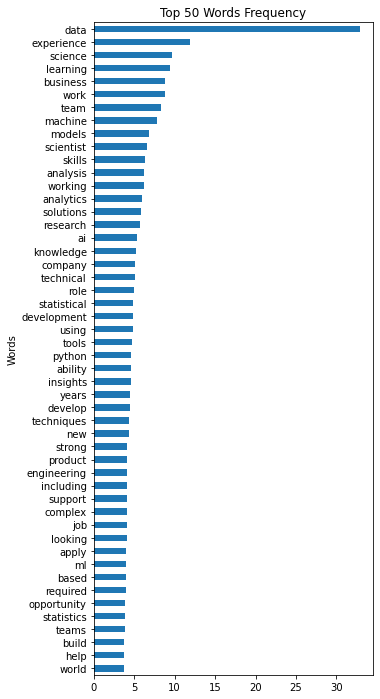

In [6]:
n = 50
tokens_freq = pd.Series(freq_mat.sum(axis=0).tolist()[0], index=tfidf.get_feature_names())
(tokens_freq.sort_values(ascending=True)
            .tail(n)
            .plot(
                kind='barh',
                title=f'Top {n} Words Frequency',
                xlabel='Words',
                ylabel='Frequency',
                figsize=[5,12]
            )
);

In [7]:
!pip install transformers

In [8]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("algiraldohe/lm-ner-linkedin-skills-recognition")
model = AutoModelForTokenClassification.from_pretrained("algiraldohe/lm-ner-linkedin-skills-recognition")

In [9]:
jobs.job_description.iloc[0]

"This role required candidate to permanently relocate at Dhahran, Saudi Arabia. About the CompanyThis company engages in the exploration, production, transportation, and sale of crude oil and natural gas. It operates through the following segments: Upstream, Downstream, and Corporate. The Upstream segment includes crude oil, natural gas and natural gas liquids exploration, field development, and production. The Downstream segment focuses on refining, logistics, power generation, and the marketing of crude oil, petroleum and petrochemical products, and related services to international and domestic customers. The Corporate segment offers supporting services including human resources, finance, and information technology. The company was founded on May 29, 1933 and is headquartered in Dhahran, Saudi Arabia. Job Summary We are seeking one (1) Data Scientist who will be responsible for the following roles and functions. The Data Scientist will collect large amounts of data using analytical,

In [10]:
input_text = jobs.job_description.to_list()
tokens = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt")
print(tokens)


{'input_ids': tensor([[  101,  2023,  2535,  ...,  1998,  3086,   102],
        [  101,  2256,  7396,  ...,  1012,  2393,   102],
        [  101,  2057,  2024,  ...,     0,     0,     0],
        ...,
        [  101, 28667,  2282,  ..., 28667,  2282,   102],
        [  101,  2012,  8040,  ...,  1012,  2017,   102],
        [  101,  2147,  2012,  ..., 25300, 27147,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}


In [11]:
with torch.no_grad():
    outputs = model(**tokens)

logits = outputs.logits

In [12]:
predicted_token_class_ids = logits.argmax(-1)

# Note that tokens are classified rather then input words which means that
# there might be more predicted token classes than words.
# Multiple token classes might account for the same word
predicted_tokens_classes = [[model.config.id2label[t.item()] for t in predicted_token_class_ids[i]] for i in range(len(predicted_token_class_ids))]

labels = predicted_token_class_ids
print(predicted_tokens_classes)
# loss = model(**inputs, labels=labels).loss

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BUS', 'I-BUS', 'O', 'O', 'B-BUS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BUS', 'I-BUS', 'O', 'O', 'B-BUS', 'O', 'O', 'B-BUS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BUS', 'I-BUS', 'O', 'O', 'O', 'B-BUS', 'O', 'B-BUS', 'I-BUS', 'O', 'O', 'O', 'O', 'I-BUS', 'I-BUS', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-BUS', 'I-BUS', 'O', 'B-BUS', 'O', 'O', 'B-TECHNICAL', 'I-TECHNICAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

In [13]:
text_list = []
classes_list = []
ids = []

for idx in range(tokens['input_ids'].shape[0]):
    for i, c in zip(tokens['input_ids'].numpy()[idx].tolist(), \
                    predicted_tokens_classes[idx]):
        if c != 'O':
            text_list.append(tokenizer.convert_ids_to_tokens(i, skip_special_tokens=True))
            classes_list.append(c)
            ids.append(idx)

In [14]:
len(text_list), len(classes_list), len(ids)

(16203, 16203, 16203)

In [15]:
text_list2 = []
classes_list2 = []
ids2 = []
ne = []
label = ''

for idx in range(len(text_list)):
    if classes_list[idx].startswith('B-'): # Beginning of a new entity
        if ne:
            text_list2.append(' '.join(ne))
            classes_list2.append(label)
            ids2.append(ids[idx])
        ne = [text_list[idx]]
        label = classes_list[idx][2:]

    elif classes_list[idx].startswith('I-'):
        if classes_list[idx][2:] == label:
            ne.append(text_list[idx])
        else:
            text_list2.append(' '.join(ne))
            classes_list2.append(label)
            ids2.append(ids[idx])
            ne = [text_list[idx]]
            label = classes_list[idx][2:]



In [16]:
text_list2[:10], classes_list2[:10], ids2[:10]

(['crude oil',
  'gas',
  'crude oil',
  'gas',
  'gas',
  'power generation',
  'marketing',
  'crude oil ##ro ##chemical',
  'human resources',
  'finance'],
 ['BUS', 'BUS', 'BUS', 'BUS', 'BUS', 'BUS', 'BUS', 'BUS', 'BUS', 'BUS'],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
job_description_skills = pd.DataFrame({'Skill':text_list2, 'Type':classes_list2, 'index': ids2})
job_description_skills

,Skill,Type,index
0,crude oil,BUS,0
1,gas,BUS,0
2,crude oil,BUS,0
3,gas,BUS,0
4,gas,BUS,0
...,...,...,...
12882,data science,TECHNICAL,232
12883,statistics,TECHNICAL,232
12884,mathematics,TECHNICAL,232
12885,computer science,TECHNICAL,232


In [18]:
job_description_skills = job_description_skills[job_description_skills.Skill != '[PAD]']

In [19]:
job_description_skills.Skill.value_counts()

data science        314
machine learning    290
python              169
ai                  153
analytics           140
                   ... 
google play           1
chat ##gp ##t         1
exploit               1
property              1
sum ##mar ##ies       1
Name: Skill, Length: 910, dtype: int64

In [39]:
job_description_skills.loc[:, 'Skill'] = job_description_skills.Skill.str.replace('( #|#|# )', '', regex=True)
job_description_skills.Type.replace('BUS', 'BUSINESS', inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [40]:
skills_w_jobs = job_description_skills.merge(
    jobs.reset_index()[['index'] + jobs.columns.difference(['job_description']).tolist()],
    on='index',
    how='left'
)

skills_w_jobs

,Skill,Type,index,Employment_type,Seniority_level,company_name,job_country,job_position,job_posting_date
0,crude oil,BUSINESS,0,Full-time,Entry level,MatchaTalent,Saudi Arabia,Data Scientist,2023-06-18
1,gas,BUSINESS,0,Full-time,Entry level,MatchaTalent,Saudi Arabia,Data Scientist,2023-06-18
2,crude oil,BUSINESS,0,Full-time,Entry level,MatchaTalent,Saudi Arabia,Data Scientist,2023-06-18
3,gas,BUSINESS,0,Full-time,Entry level,MatchaTalent,Saudi Arabia,Data Scientist,2023-06-18
4,gas,BUSINESS,0,Full-time,Entry level,MatchaTalent,Saudi Arabia,Data Scientist,2023-06-18
...,...,...,...,...,...,...,...,...,...
5973,data science,TECHNICAL,232,Full-time,Entry level,BCAA,Canada,Data Science Analyst II,2023-06-16
5974,statistics,TECHNICAL,232,Full-time,Entry level,BCAA,Canada,Data Science Analyst II,2023-06-16
5975,mathematics,TECHNICAL,232,Full-time,Entry level,BCAA,Canada,Data Science Analyst II,2023-06-16
5976,computer science,TECHNICAL,232,Full-time,Entry level,BCAA,Canada,Data Science Analyst II,2023-06-16


In [41]:
# skills_w_jobs.Skill = skills_w_jobs.Skill.str.replace('( #|#|# )', '', regex=True)

In [42]:
skills_w_jobs.drop(columns=['index']).to_csv('./data/skills_with_jobs.csv', index=False)

In [43]:
import seaborn as sns

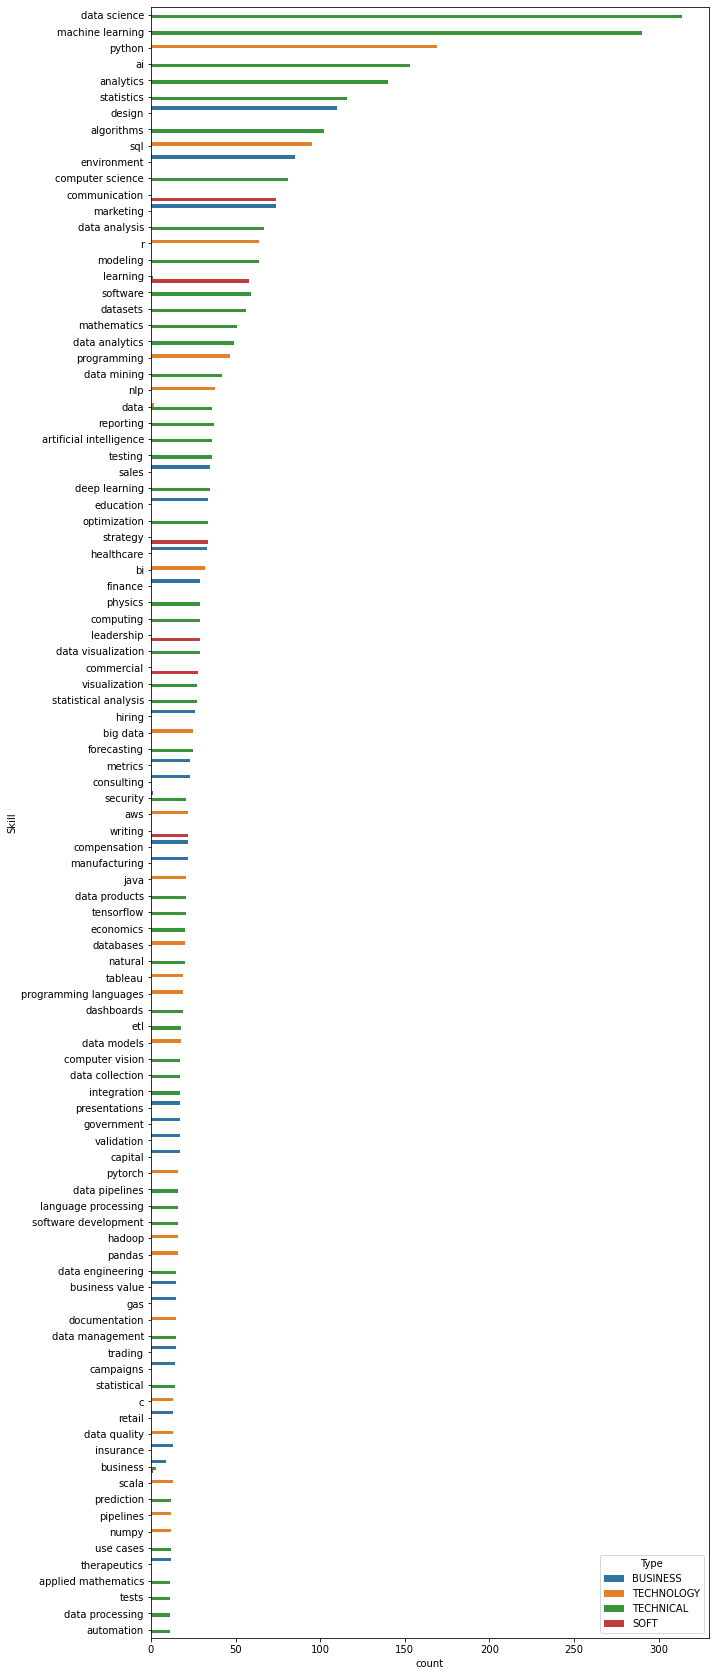

In [44]:
plt.figure(figsize=[10, 30])
df_viz = job_description_skills[job_description_skills.Skill.isin(job_description_skills.Skill.value_counts().index[:100])]
sns.countplot(y=df_viz['Skill'], hue=df_viz['Type'], orient='v', order=df_viz['Skill'].value_counts().index[:100]);

In [49]:
df_viz2 = df_viz[['Skill', 'Type']].groupby('Skill').agg(['size', 'first']).reset_index()
print(df_viz2.head())
df_viz2.columns = ['Skill', 'Count', 'Type']
# df_viz2.Skill = df_viz2.Skill.str.replace('(#|# )', '', regex=True)
df_viz2 = df_viz2.sort_values(by='Count', ascending=False)

                     Skill Type           
                           size      first
0                       ai  153  TECHNICAL
1               algorithms  102  TECHNICAL
2                analytics  140  TECHNICAL
3      applied mathematics   11  TECHNICAL
4  artificial intelligence   36  TECHNICAL


In [50]:
import plotly.express as px

fig = px.bar(
            df_viz2,
            x='Skill',
            y='Count',
            color='Type',
            width=900,
            color_discrete_sequence=px.colors.qualitative.Vivid
)

fig.show()